# <b> Multiple Linear Regression.

## Importing Libraries.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt   


## Importing Inbuilt dataset from sklearn

In [3]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
## Describing the dataset.
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [5]:
california.data.shape

(20640, 8)

In [6]:
## This is our dependent feature.
california.target_names

['MedHouseVal']

In [7]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [8]:
california.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

## Preparing the dataset.

In [9]:
dataset = pd.DataFrame(california.data, columns=california.feature_names)
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [10]:
dataset['Price'] = california.target

In [11]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## EDA and Feature Scaling

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


- Conclusion: All the datapoints are of float type

In [13]:
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [14]:
## Checking for missing values.
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

- Conclusion: Dataset has no missing values.

In [15]:
## Finding Correlation.
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<AxesSubplot: >

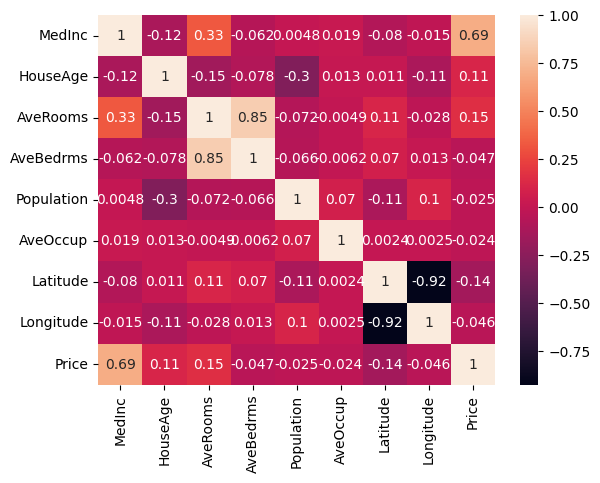

In [16]:
## Visualizing the correlation graphically
sns.heatmap(dataset.corr(), annot=True)

# Splitting the dataset into dependent and independent feature.

In [17]:
X = dataset.iloc[:,:-1]   # [selecting all the columns, select all column except the last column]
y = dataset.iloc[:,-1]    # [selecting all the columns, select the last column]

In [18]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [19]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Price, Length: 20640, dtype: float64

## Spliting the dataset into training and test set

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=10)

## Scaling the dataset.

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

- Transform() is  used for X_train so as to avoid information of test set getting leaked into the training set. 

# Model Training

In [25]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train) 

LinearRegression()

In [26]:
## Slope of 8 features.
regressor.coef_

array([ 0.82872299,  0.1231163 , -0.27068752,  0.32859106,  0.00213572,
       -0.02810091, -0.93017985, -0.89505497])

In [27]:
## Intercept of 8 features.
regressor.intercept_

2.0634768086491184

## Predicting the result

In [28]:
y_pred_test = regressor.predict(X_test_scaled)

In [30]:
ls_actual = list(y_test)
ls_predicted = list(y_pred_test)

for i in zip(ls_actual, ls_predicted):
    print(i)

(1.674, 3.003974848577873)
(3.541, 2.5801148606506823)
(1.602, 2.348907696832475)
(1.408, 1.7154618960296524)
(1.078, 1.7401665755973015)
(1.188, 0.7582920637377699)
(1.549, 2.182821442189643)
(2.081, 2.2559677350337526)
(0.923, 1.1757246607523804)
(4.04, 3.3961024669901665)
(1.378, 1.3880653386305948)
(5.00001, 1.9124682996589788)
(1.579, 2.433769999194136)
(1.094, 1.1714967302740669)
(0.889, 1.4058184574882675)
(1.462, 1.220676491128157)
(1.226, 1.7133474428421591)
(3.75, 2.720733454217885)
(1.969, 2.3678463722210528)
(1.798, 1.0002201086947058)
(5.00001, 4.983206133619921)
(0.979, 1.206685980619536)
(1.955, 2.5038836872448016)
(1.014, 1.4820396462919074)
(3.118, 3.28865900033007)
(1.007, 1.643419218477358)
(1.858, 2.5690366350539717)
(2.949, 3.104808647762488)
(2.763, 1.9355315474401908)
(0.574, 1.0391400527827814)
(2.802, 2.3234119088966225)
(0.869, 1.128166085658441)
(2.292, 2.2734190230585782)
(1.265, 1.637486939317896)
(1.097, 1.6618402636428298)
(1.404, 2.0861390322158844)
(3.2

## Performance Matrices with respect to cost function.

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)

In [32]:
print(mse)
print(mae)
print(rmse)

0.552233239936362
0.5371056943007961
0.743123973463622


### R-Squared value

In [33]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred_test)
score

0.5935958526436639

- Conclusion: The model is approximately 60 percent accurate

### Adjusted R-Squared value

In [35]:
A_score = 1-(1-score)*(len(y_test) - 1)/(len(y_test) - X_test.shape[1] - 1)

In [36]:
A_score

0.5931179409607519

# Pickling

In [38]:
import pickle
## Serialising.
pickle.dump(scaler,open('scaler.pkl', 'wb'))
pickle.dump(regressor,open('regressor.pkl','wb'))

In [40]:
## Deserialising
model_regressor = pickle.load(open('regressor.pkl','rb'))
standard_scaler = pickle.load(open('scaler.pkl','rb'))

model_regressor.predict(standard_scaler.transform(X_test))

array([3.00397485, 2.58011486, 2.3489077 , ..., 3.09003708, 0.79152007,
       2.04477012])

# END